# Creating Charts

Pandas allows you to read structured datasets and visualize them using the `plot()` method. By default, Pandas uses `matplotlib` to create the plots.

In this notebook, we will take work with open dataset of crime in London.

In [2]:
import pandas as pd
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt

We have 12 different CSV files containing crime data for each month of 2020. We can use the `glob` module to find all files matching a pattern.

In [3]:
data_pkg_path = 'data'
folder = 'crime'
file_pattern = '2020-*.csv'
file_path_pattern = os.path.join(data_pkg_path, folder, file_pattern)

file_list = []
for file in glob.glob(file_path_pattern):
    file_list.append(file)
file_list

['data/crime/2020-05-metropolitan-street.csv',
 'data/crime/2020-12-metropolitan-street.csv',
 'data/crime/2020-01-metropolitan-street.csv',
 'data/crime/2020-02-metropolitan-street.csv',
 'data/crime/2020-11-metropolitan-street.csv',
 'data/crime/2020-06-metropolitan-street.csv',
 'data/crime/2020-09-metropolitan-street.csv',
 'data/crime/2020-04-metropolitan-street.csv',
 'data/crime/2020-08-metropolitan-street.csv',
 'data/crime/2020-07-metropolitan-street.csv',
 'data/crime/2020-10-metropolitan-street.csv',
 'data/crime/2020-03-metropolitan-street.csv']

It will be helpful to merge all these files into a single dataframe. We can use `pd.concat()` to merge a list of dataframes.

In [4]:
dataframe_list = []

for file in file_list:
    df = pd.read_csv(file)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

Let's create a pie-chart showing the distribution of different types of crime. Pandas `groupby()` function allows us to calculate group statistics.

In [5]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

Crime type
Anti-social behaviour           415105
Bicycle theft                    23517
Burglary                         61044
Criminal damage and arson        50923
Drugs                            51629
Other crime                      10066
Other theft                      81924
Possession of weapons             5763
Public order                     53458
Robbery                          27269
Shoplifting                      34588
Theft from the person            31084
Vehicle crime                   108344
Violence and sexual offences    227208
dtype: int64

We now uses the `plot()` method to create the chart. This method is a wrapper around `matplotlib` and can accept supported arguments from it. 

Reference: [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

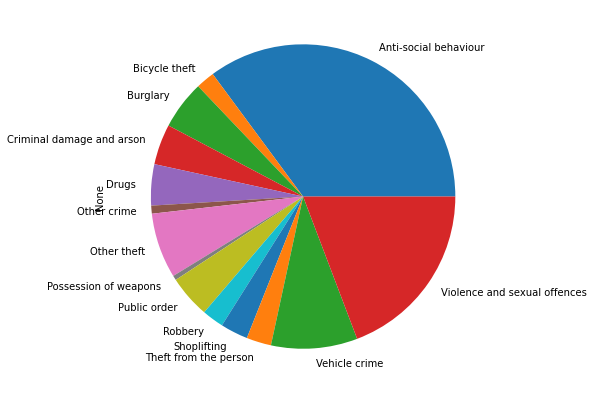

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
type_counts.plot(kind='pie', ax=ax)
plt.show()

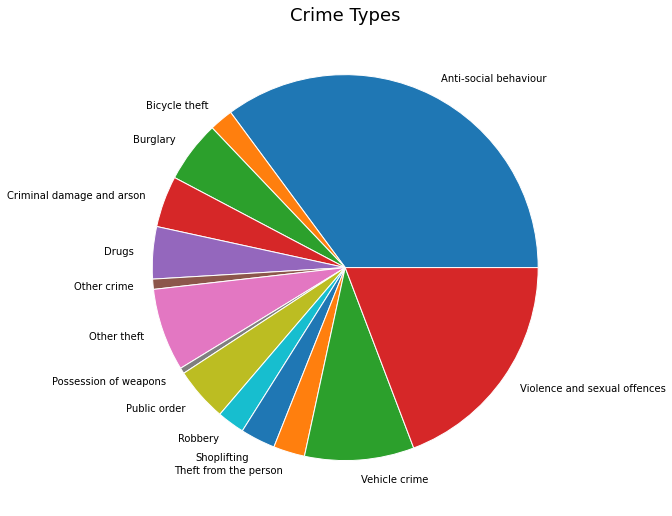

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
type_counts.plot(kind='pie', ax=ax, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, label='')
plt.tight_layout()
plt.title('Crime Types', fontsize = 18)

plt.show()

We can also chart the trend of crime over the year. For this, let's group the data by month.

In [7]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

Month
2020-01     90979
2020-02     86984
2020-03     87409
2020-04    109951
2020-05    114008
2020-06    100198
2020-07    103657
2020-08    104782
2020-09     99633
2020-10     99471
2020-11     96914
2020-12     87936
dtype: int64

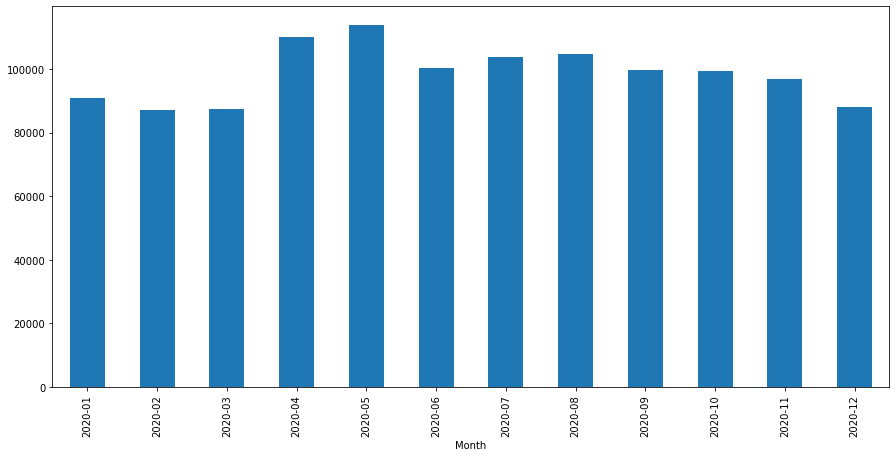

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

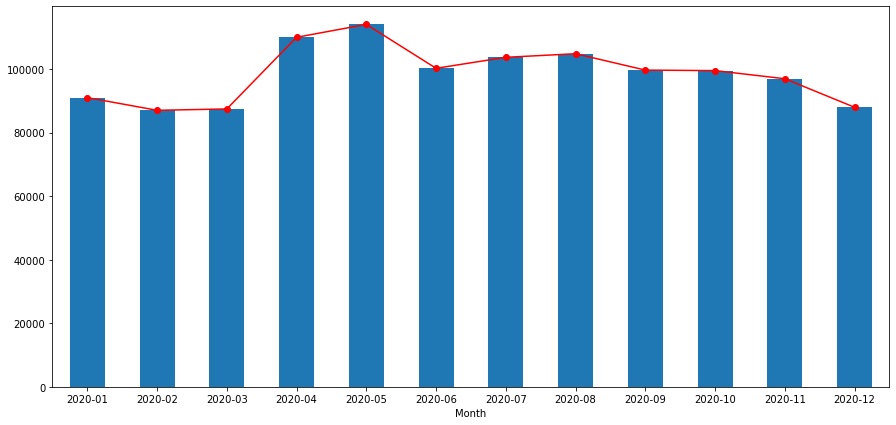

In [26]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')
plt.show()

## Exercise

Plot the trend of Bicycle thefts as a line chart. The cell below filters the `merged_df` dataframe to select incidents of 'Bicycle theft'. Group the results by months and plot the results.

In [21]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']